<a href="https://colab.research.google.com/github/Gqndhi/COVID-19/blob/master/COVID19_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dissemination of COVID-19 - Bar Chart Race

------

######To view the bar chart race, use the link to open the in google colab

###Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
%matplotlib inline

###Pre-Processing and Data Cleaning

In [2]:
#Data obtained from data.humdata.org
Covid_df=pd.read_csv('COVID-19 Cases.csv')

In [3]:
Covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880,880,884,884,889,889,897,897,897,907,907,918,922,925,925,925
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687,705,749,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199


In [4]:
Covid_df.drop(['Province/State','Lat','Long'],axis=1,inplace=True)
Covid_df['Total']= Covid_df.sum(axis=1)
Cases_df=Covid_df.sort_values(by=['Total'],axis=0,ascending=False)[0:8].T
Header = Cases_df.iloc[0]
Cases_df = Cases_df[1:]
Cases_df.columns = Header
Cases_df = Cases_df[0:194]
Cases_df.head()

Country/Region,US,Brazil,India,Russia,Spain,United Kingdom,Italy,Germany
1/22/20,1,0,0,0,0,0,0,0
1/23/20,1,0,0,0,0,0,0,0
1/24/20,2,0,0,0,0,0,0,0
1/25/20,2,0,0,0,0,0,0,0
1/26/20,5,0,0,0,0,0,0,0


In [5]:
Cases_df=Cases_df.reset_index()
Cases_df = Cases_df.rename(columns={'index':'Date','United Kingdom':'UK'})
Cases_df['Date']=pd.to_datetime(Cases_df['Date'])
Cases_df = Cases_df.set_index('Date')
Cases_df = Cases_df.astype(float)

Cases_df.head()

Country/Region,US,Brazil,India,Russia,Spain,UK,Italy,Germany
Date,,,,,,,,
2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Data Visualization

In [6]:
test = Cases_df.loc['2020-03-29']
test

Country/Region
US         141205.0
Brazil       4256.0
India        1024.0
Russia       1534.0
Spain       80110.0
UK          29696.0
Italy       97689.0
Germany     62095.0
Name: 2020-03-29 00:00:00, dtype: float64

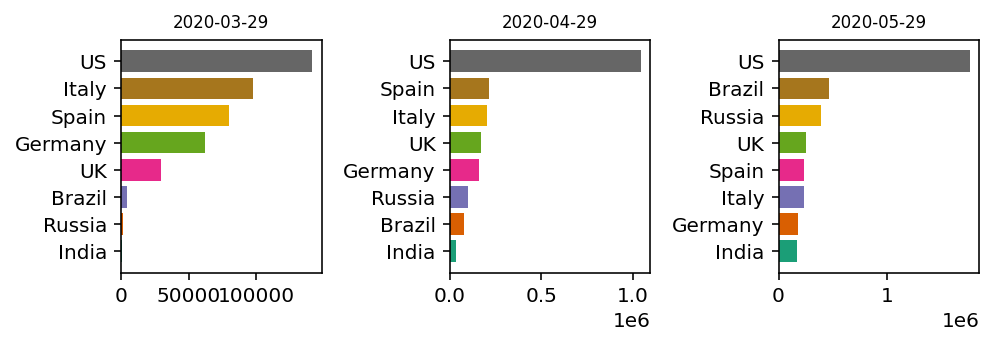

In [7]:
#As the country's position changes the color changes along with it
colors = plt.cm.Dark2(range(8))
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)
dates = ['2020-03-29', '2020-04-29', '2020-05-29']
for ax, date in zip(ax_array, dates):
    test = Cases_df.loc[date].sort_values()
    
    ax.barh(y=test.index, width=test.values, color=colors)
    ax.set_title(date, fontsize='smaller')
    

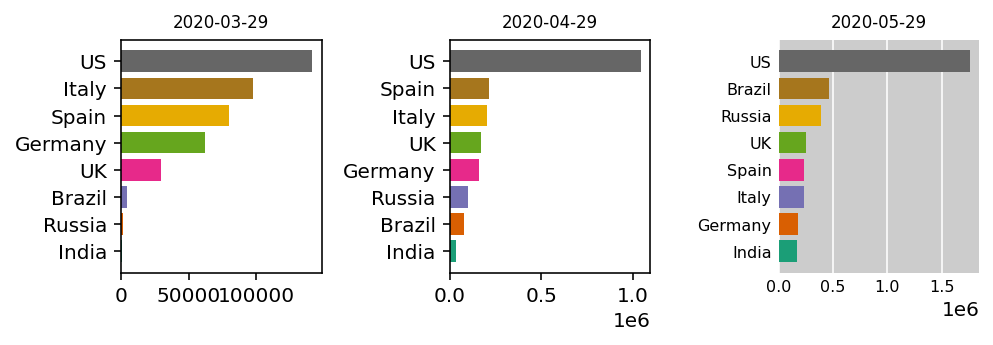

In [8]:
#a function to smoothen the axes
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

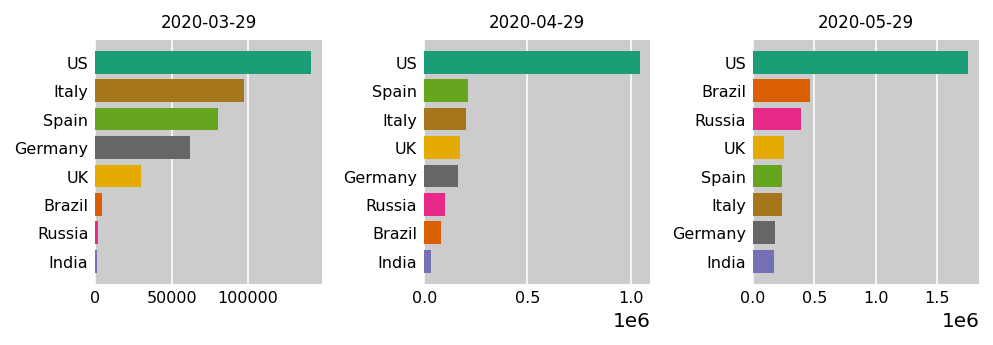

In [9]:
#To keep the color of the country constant use the rank function
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)
dates = ['2020-03-29', '2020-04-29', '2020-05-29']
for ax, date in zip(ax_array, dates):
    test1 = Cases_df.loc[date]
    y = Cases_df.loc[date].rank().values
    ax.barh(y=y, width=test1.values, color=colors, tick_label=test1.index)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

###Preparing the data for the animation

In [10]:
Cases = Cases_df.reset_index(inplace = False)
Cases.index = Cases.index*5
Cases.head()

Country/Region,Date,US,Brazil,India,Russia,Spain,UK,Italy,Germany
0,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2020-01-24,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2020-01-26,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
Cases = Cases.reindex(range(Cases.index[-1]+1))
Cases.head(10)

Country/Region,Date,US,Brazil,India,Russia,Spain,UK,Italy,Germany
0,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
Cases['Date'] = Cases['Date'].fillna(method = 'ffill')
Cases = Cases.set_index('Date')
Cases = Cases.astype(float)

Cases.head()

Country/Region,US,Brazil,India,Russia,Spain,UK,Italy,Germany
Date,,,,,,,,
2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
Cases_ranked = Cases.rank(axis=1)
Cases_ranked.interpolate(inplace=True)
Cases_ranked = Cases_ranked['2020-03-10':'2020-08-2']
Cases_ranked.tail()

Country/Region,US,Brazil,India,Russia,Spain,UK,Italy,Germany
Date,,,,,,,,
2020-08-01,8.0,7.0,6.0,5.0,3.0,4.0,2.0,1.0
2020-08-01,8.0,7.0,6.0,5.0,3.0,4.0,2.0,1.0
2020-08-01,8.0,7.0,6.0,5.0,3.0,4.0,2.0,1.0
2020-08-01,8.0,7.0,6.0,5.0,3.0,4.0,2.0,1.0
2020-08-02,8.0,7.0,6.0,5.0,3.0,4.0,2.0,1.0


In [28]:
Cases.interpolate(inplace=True)
Cases = Cases['2020-03-10':'2020-08-2']

Cases.tail()

Country/Region,US,Brazil,India,Russia,Spain,UK,Italy,Germany
Date,,,,,,,,
2020-08-01,4629946.2,2713037.0,1761317.4,844967.4,288522.0,304090.6,247879.6,211048.0
2020-08-01,4639448.4,2718197.0,1771911.8,846044.8,288522.0,304239.2,247927.2,211091.0
2020-08-01,4648950.6,2723357.0,1782506.2,847122.2,288522.0,304387.8,247974.8,211134.0
2020-08-01,4658452.8,2728517.0,1793100.6,848199.6,288522.0,304536.4,248022.4,211177.0
2020-08-02,4667955.0,2733677.0,1803695.0,849277.0,288522.0,304685.0,248070.0,211220.0


###Making the Bar Chart Race

In [56]:
def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = Cases_ranked.iloc[i]
    width = Cases.iloc[i]
    ax.barh(y=y, width=width,height=-0.7,edgecolor=colors, color=colors, tick_label=labels,align = 'edge')
    date_str = Cases.index[i].strftime('%B %-d, %Y')
    ax.set_title(f'COVID-19 Cases by Country - {date_str}', fontsize='smaller')
    ax.set_xlabel('Number of affected people')
    
labels =  Cases.columns  
fig = plt.Figure(figsize=(5, 5), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(Cases), 
                     interval=50, repeat=False)

In [57]:
html = anim.to_html5_video()
HTML(html)
